#### Nama: Muhammad Arif Septian
#### NIM: 2309106046

#### **Import Libary dan Membaca Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

##### **Menampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.**

In [3]:
# Mengambil hanya kolom beratribut numerik saja
numeric_cols = df.select_dtypes(include="number")

# Menghitung statistik dari dataset
stats = numeric_cols.describe().T

# Menambahkan kolom std, Q1, Q2, dan Q3
stats["std"] = numeric_cols.std()
stats["Q1"] = numeric_cols.quantile(0.25)
stats["Q2"] = numeric_cols.quantile(0.50)
stats["Q3"] = numeric_cols.quantile(0.75)

# Mengambil kolom yang relevan
results = stats[["mean","std","min","max","Q1","Q2","Q3"]]

# Menampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3
results

,mean,std,min,max,Q1,Q2,Q3
id,36517.829354,21161.721625,67.00,72940.00,17741.250,36932.000,54682.00
age,43.226614,22.612647,0.08,82.00,25.000,45.000,61.00
hypertension,0.097456,0.296607,0.00,1.00,0.000,0.000,0.00
heart_disease,0.054012,0.226063,0.00,1.00,0.000,0.000,0.00
avg_glucose_level,106.147677,45.283560,55.12,271.74,77.245,91.885,114.09
bmi,28.893237,7.854067,10.30,97.60,23.500,28.100,33.10
stroke,0.048728,0.215320,0.00,1.00,0.000,0.000,0.00


#### **Menampilkan 10 record pertama dari dataset dengan attribute bertipe angka**

In [4]:
# Mengambil hanya kolom beratribut numerik saja
numeric_cols = df.select_dtypes(include="number")

# Menampilkan 10 record pertama dari dataset dengan attribute bertipe angka
numeric_cols.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
5,56669,81.0,0,0,186.21,29.0,1
6,53882,74.0,1,1,70.09,27.4,1
7,10434,69.0,0,0,94.39,22.8,1
8,27419,59.0,0,0,76.15,NaN,1
9,60491,78.0,0,0,58.57,24.2,1


#### **Menampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka**

In [5]:
# Mengambil informasi jumlah record
record_count = len(df)

# Mengambil informasi jumlah atribut
attribute_count = df.shape[1]

# Mengambil informasi nama atribut
attribute_names = df.columns.tolist()

# Mengambil informasi jumlah atribut bertipe numerik
numeric_attribute_count = df.select_dtypes(include="number").shape[1]

# Menampilkan hasil  informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka
print(f"Jumlah record: {record_count}")
print(f"Jumlah attribute: {attribute_count}")
print(f"Nama attribute: {attribute_names}")
print(f"Jumlah attribute numerik: {numeric_attribute_count}")

Jumlah record: 5110
Jumlah attribute: 12
Nama attribute: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Jumlah attribute numerik: 7


#### **Menampilkan jumlah label dari semua attribute yang bernilai object**

In [9]:
# Mengambil kolom kategorikal
categoricals_cols = df.select_dtypes(include="object")

# Jumlah data per kolom
label_counts = categoricals_cols.count()

# Jumlah label unik per kolom
unique_counts = categoricals_cols.nunique()

# Menampilkan hasil
print("Jumlah data tiap kolom kategorikal:")
print(label_counts)
print("\nJumlah label unik tiap kolom kategorikal:")
print(unique_counts)

Jumlah data tiap kolom kategorikal:
gender            5110
ever_married      5110
work_type         5110
Residence_type    5110
smoking_status    5110
dtype: int64

Jumlah label unik tiap kolom kategorikal:
gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64


####  Visualisasi data kolom stroke menggunakan diagram batang

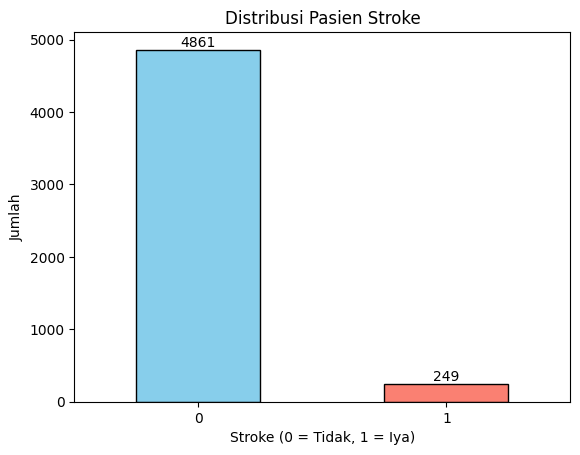

In [10]:
# Menghitung distribusi stroke (0 = tidak, 1 = iya)
stroke_counts = df["stroke"].value_counts().sort_index()

# Membuat diargam batang
ax = stroke_counts.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Distribusi Pasien Stroke")
plt.xlabel("Stroke (0 = Tidak, 1 = Iya)")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)

# Melakukan perulangan untuk menambahkan jumlah data di atas diagram batang
for i, count in enumerate(stroke_counts):
    plt.text(i, count + 5, str(count), ha="center", va="bottom", fontsize=10)

# Menampilkan diagram batang
plt.show()


#### Menampilkan korelasi dataset menggunakan heatmap

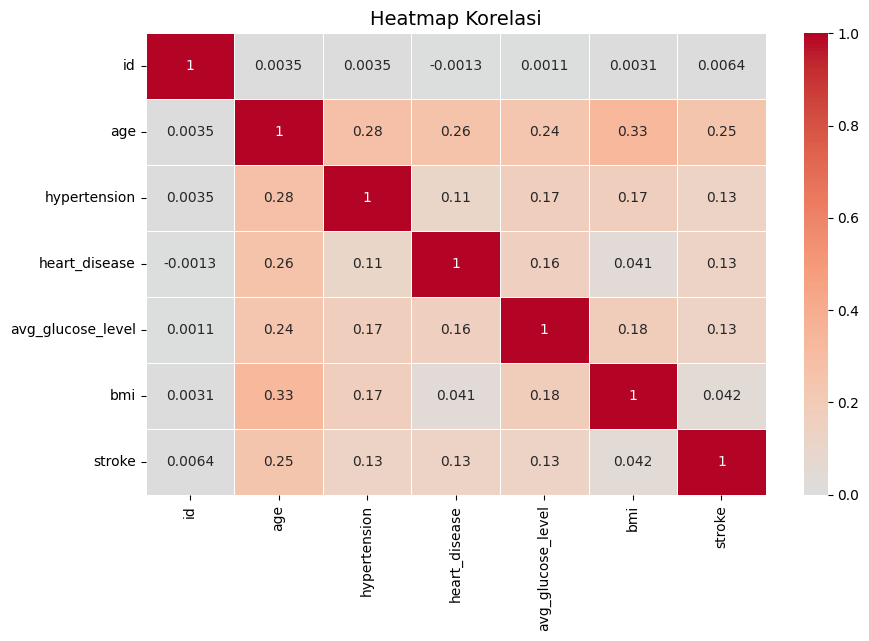

In [11]:
# Mengambil hanya kolom beratribut numerik saja
numeric_cols = df.select_dtypes(include="number")

# Menghitung korelasi
correlation_matrix = numeric_cols.corr()

# Membuat Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
)
plt.title("Heatmap Korelasi", fontsize=14)

# Menampilkan heatmap
plt.show()

#### **Kesimpulan Hasil Analisis dan Visualisasi Data**

1. Statistika Deskriptif <br>
    Berdasarkan analisis statistik deskriptif, mayoritas pasien berada pada rentang usia 25–61 tahun dengan rata-rata 43 tahun. Proporsi pasien dengan hipertensi, penyakit jantung, maupun stroke relatif kecil (masing-masing sekitar 9,7%, 5,4%, dan 4,9%), sehingga distribusi data tidak seimbang. Rata-rata kadar glukosa sebesar 106,15 mg/dL menunjukkan variasi yang cukup besar, sedangkan nilai BMI rata-rata 28,89 mengindikasikan sebagian besar pasien tergolong overweight.

2. Sampel Data <br>
    Berdasarkan 10 record pertama, pasien stroke umumnya berusia lanjut (59–81 tahun) dan sebagian memiliki penyakit penyerta seperti penyakit jantung. Kadar glukosa rata-rata cukup tinggi, sedangkan BMI sebagian besar menunjukkan kategori overweight hingga obesitas. Hal ini mengindikasikan bahwa usia lanjut, kadar glukosa tinggi, dan kondisi penyerta dapat berkorelasi dengan risiko st

3. Informasi Dataset <br>
    Berdasarkan dataset yang dianalisis, jumlah record adalah 5.110 dengan 12 atribut. Nama-nama atribut tersebut meliputi id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, dan stroke. Dari 12 atribut tersebut, 7 atribut bertipe numerik, sedangkan sisanya merupakan atribut kategorikal.

4. Distribusi atribut kategorikal <br>
    Berdasarkan dataset yang dianalisis, terdapat 5.110 record dengan 12 atribut, terdiri dari 7 atribut numerik dan 5 atribut kategorikal. Semua atribut kategorikal memiliki data lengkap sebanyak 5.110 record dengan jumlah label unik yang bervariasi, yaitu gender (3), ever_married (2), work_type (5), Residence_type (2), dan smoking_status (4). Hal ini menunjukkan bahwa dataset cukup lengkap dan kaya variasi kategori untuk dianalisis lebih lanjut

5. Visualisasi Dataset <br>
    Diagram batang menunjukkan distribusi pasien berdasarkan status stroke. Dari total data, terdapat 4861 pasien tidak mengalami stroke dan 249 pasien mengalami stroke. Artinya, kasus stroke jauh lebih sedikit dibandingkan yang tidak stroke. Walaupun proporsinya kecil, jumlah pasien yang mengalami stroke tetap signifikan sehingga faktor risiko dan pencegahan perlu mendapat perhatian.

6. Korelasi antar variabel menggunakan heatmap <br>
    Berdasarkan heatmap korelasi, usia memiliki hubungan positif sedang dengan hipertensi, penyakit jantung, dan stroke, sehingga bertambahnya usia cenderung meningkatkan risiko stroke. BMI berkorelasi moderat dengan usia tetapi lemah dengan stroke, sedangkan kadar glukosa hanya memiliki korelasi rendah dengan stroke. Secara keseluruhan, usia muncul sebagai faktor yang paling konsisten terkait risiko dan kejadian stroke.